In [1]:
 from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

In [2]:
secret_number = '101001';

In [3]:
circuit = QuantumCircuit((len(secret_number)+1), len(secret_number))

In [4]:
circuit.h(range(len(secret_number)))
circuit.x(len(secret_number))
circuit.h(len(secret_number))
circuit.barrier()

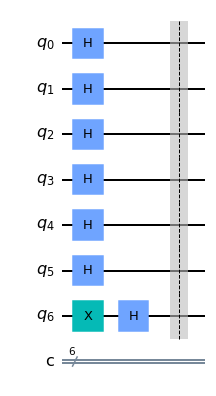

In [5]:
circuit.draw(output = 'mpl')

In [6]:
#Applying this on the bits that we know will have a 1 on them.

for i, string in enumerate(reversed(secret_number)):
    if string == '1':
        circuit.cx(i, len(secret_number))
        
#The code above is a better way of writing this: 
# circuit.cx(5, 6)
# circuit.cx(3, 6)
# circuit.cx(0, 6)

circuit.barrier()

In [7]:
#Storing the values in the Classical bits
circuit.h([0,1,2,3,4,5])
circuit.measure([0,1,2,3,4,5], [0, 1, 2, 3, 4, 5])

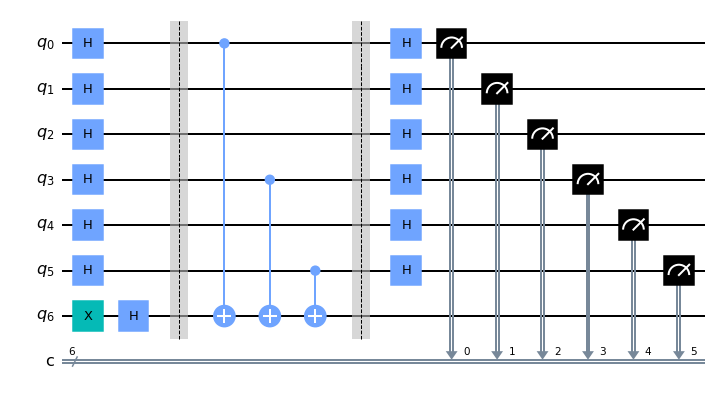

In [8]:
circuit.draw(output = 'mpl')

In [9]:
sim = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = sim, shots = 1).result()
counts = result.get_counts()

print(counts)

{'101001': 1}


In [10]:
#As one can see, this prints the number over in the counts part of it. 